# **Loading data**

In [ ]:
from google.colab import files

uploadedFiles = files.upload()

Saving keifiat.xlsx to keifiat.xlsx
Saving stopWords.txt to stopWords.txt


In [ ]:
from io import StringIO
import pandas as pd

In [ ]:
def decode(fileName):
  return StringIO(uploadedFiles[fileName + '.txt'].decode("utf-8"))

In [ ]:
def read(fileName, fileType):
  if fileType == 'excel':
    return pd.read_excel(uploadedFiles[fileName + '.xlsx'], header = 0)
  return decode(fileName).read()

In [ ]:
def get_input(name):
  return input("please enter " + name + " file name:  ")

In [ ]:
#comments = read(get_input('comment'), 'excel')

In [ ]:
#stopwords = read(get_input('stop word'), 'text')

# **after loaded**

In [ ]:
import pandas as pd

In [ ]:
with open('stopWords.txt') as f:
    stopwords = f.read()

In [ ]:
comments = pd.read_excel('keifiat.xlsx', header = 0)

# **Exploring data**

In [ ]:
import seaborn as sns

In [ ]:
comments.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [ ]:
comments.drop(comments[comments['recommend'] == r'\N'].index, inplace = True)

**pie chart of product id**

<Axes: ylabel='recommend'>

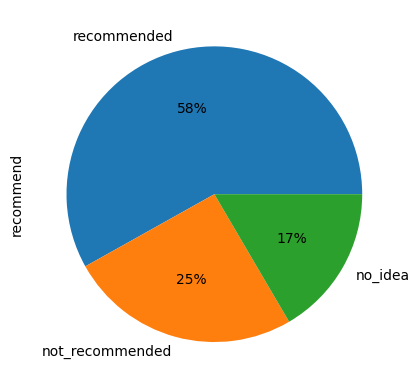

In [ ]:
comments.recommend.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: xlabel='recommend', ylabel='count'>

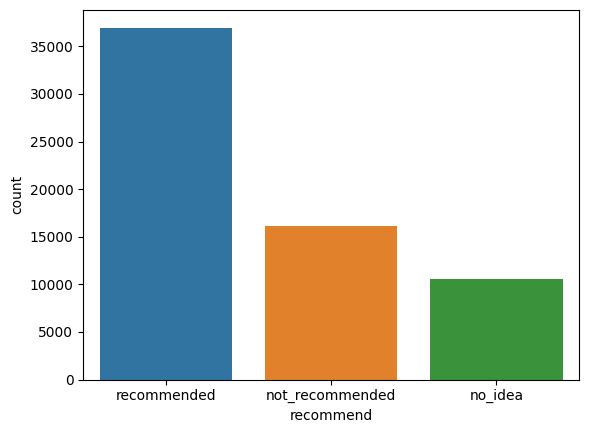

In [ ]:
sns.countplot(x = comments.recommend)

<Axes: ylabel='title_en'>

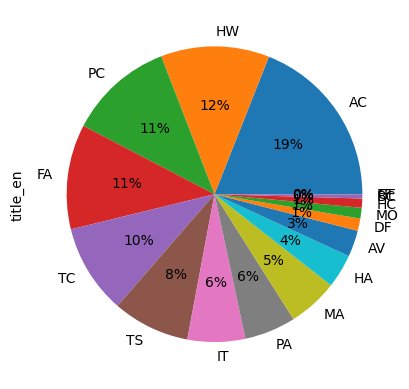

In [ ]:
comments.title_en.value_counts().plot(kind='pie', autopct='%1.0f%%')

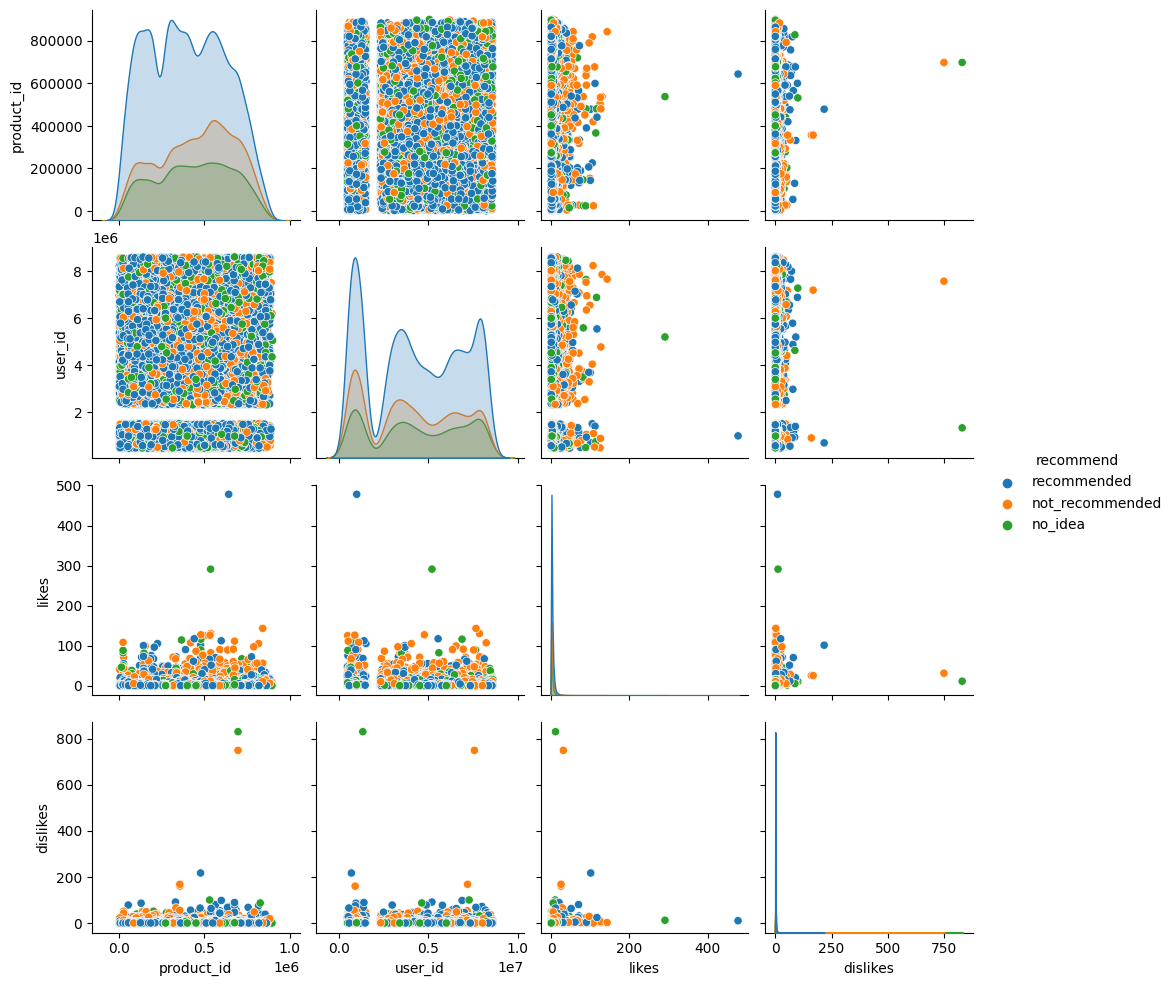

In [ ]:
sns.pairplot(comments, hue = 'recommend')

In [ ]:
def add_comments_count(ids, comments, sorting):
  comments_on_a_product = comments[ids.isin(ids[ids.duplicated()])].sort_values(sorting)

  comments_count  = pd.Series(comments_on_a_product[sorting].value_counts(), name='comment_count')

  return comments_on_a_product.merge(comments_count, left_index=True, right_index=True).sort_values(sorting).reset_index(drop=True)

In [ ]:
ids = comments["product_id"]

products_comments = add_comments_count(ids, comments, 'product_id')

<Axes: xlabel='title_en', ylabel='comment_count'>

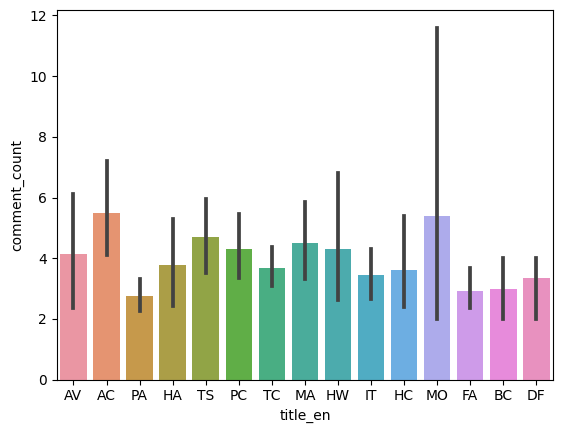

In [ ]:
sns.barplot(x='title_en', y='comment_count' , data=products_comments)

# **Preprocessing**

In [ ]:
def delete_dup(df, column):
  return df.drop_duplicates(subset=[column], inplace=True)  #dropping duplicates

In [ ]:
def delete_nan(df, column):
  return df.dropna(subset=[column], inplace=True)

In [ ]:
comments = comments.loc[:, ['product_id', 'title_en', 'recommend', 'title', 'comment']]

In [ ]:
comments

,product_id,title_en,recommend,title,comment
1,90213,AC,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
2,59473,HW,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...
3,120499,MO,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...
4,67200,AC,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...
5,133722,IT,recommended,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...
...,...,...,...,...,...
99994,400647,FA,no_idea,سلام,کیفیت ساختش بد نیست ولی نسبت به قیمتش و برند ن...
99995,549845,TC,recommended,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم
99997,820985,FA,recommended,خوبه و غلیظه,واکس خوبیه..
99998,678073,TC,no_idea,سلام,هیچ کدوم از این رنگهای که توی عکسه داخل بسته ن...


In [ ]:
before_deletion = comments.index.size

delete_dup(comments, 'comment')
delete_nan(comments, 'comment')

print(before_deletion - comments.index.size)

2259


In [ ]:
import re
from nltk.tokenize import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer('\s+', gaps = True)

In [ ]:
def tokenize_text(text):
  return tokenizer.tokenize(re.sub("\W", " ", text))

In [ ]:
stopwords = tokenize_text(stopwords)

In [ ]:
def delete_empty_rows(df):
  return df.drop(df[df.comment == ' '].index, inplace = True)

In [ ]:
def delete_stopwords(tokens):
  filtered_tokens = ''

  for word in tokens:
    if word not in stopwords:
      filtered_tokens = filtered_tokens + ' ' + word

  return filtered_tokens

In [ ]:
def change_row_val(df, row, newVal):
  return df.replace(row, newVal, inplace = True)

In [ ]:
def update_df(df, column):
  for row in df[column]:
    change_row_val(df, str(row), delete_stopwords(tokenize_text(str(row))))

  delete_empty_rows(df)
  return delete_dup(df, column)

In [ ]:
update_df(comments, 'comment')

In [ ]:
comments

,product_id,title_en,recommend,title,comment
1,90213,AC,recommended,واقعاً عالیه,سلام اینکه نظرم رو بگم میخواستم موضوع مهم اشا...
2,59473,HW,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی س...
3,120499,MO,no_idea,گوشی مقرون به صرفه,رابطه ظاهر این گوشی بسیار خوب بدنه یکپارچه فل...
4,67200,AC,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید _x000D_ یه شار...
5,133722,IT,recommended,اقرار بیش از حد در ایراد گرفتن,سلام دوستان _x000D_ منم مثه بعضی دوستان خرید ...
...,...,...,...,...,...
99994,400647,FA,no_idea,سلام,کیفیت ساختش بد نیست نسبت قیمتش برند نایکی انت...
99995,549845,TC,recommended,بسیار تمیز و زیبا,بسیار تمیز زیبا خیلی راضیم
99997,820985,FA,recommended,خوبه و غلیظه,واکس خوبیه
99998,678073,TC,no_idea,سلام,کدوم این رنگهای عکسه داخل بسته نیست رنگ کرم ر...


In [ ]:
for comment in comments.comment:
  if not type(comment) == str: comments.drop(comments[comments['comment'] == comment].index, inplace = True)

In [ ]:
comments.dropna(inplace = True)

# **Vectorizing: TF IDF**

In [ ]:
comments

,product_id,title_en,recommend,title,comment
1,90213,AC,recommended,واقعاً عالیه,سلام اینکه نظرم رو بگم میخواستم موضوع مهم اشا...
2,59473,HW,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی س...
3,120499,MO,no_idea,گوشی مقرون به صرفه,رابطه ظاهر این گوشی بسیار خوب بدنه یکپارچه فل...
4,67200,AC,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید _x000D_ یه شار...
5,133722,IT,recommended,اقرار بیش از حد در ایراد گرفتن,سلام دوستان _x000D_ منم مثه بعضی دوستان خرید ...
...,...,...,...,...,...
99994,400647,FA,no_idea,سلام,کیفیت ساختش بد نیست نسبت قیمتش برند نایکی انت...
99995,549845,TC,recommended,بسیار تمیز و زیبا,بسیار تمیز زیبا خیلی راضیم
99997,820985,FA,recommended,خوبه و غلیظه,واکس خوبیه
99998,678073,TC,no_idea,سلام,کدوم این رنگهای عکسه داخل بسته نیست رنگ کرم ر...


In [ ]:
texts = comments['comment']

In [ ]:
texts

1         سلام اینکه نظرم رو بگم میخواستم موضوع مهم اشا...
2         گیره های فلزی خیلی سخت میشوند لذا حوله خیلی س...
3         رابطه ظاهر این گوشی بسیار خوب بدنه یکپارچه فل...
4         ظرفیتش براتون کافیه حتما بخرید _x000D_ یه شار...
5         سلام دوستان _x000D_ منم مثه بعضی دوستان خرید ...
                               ...                        
99994     کیفیت ساختش بد نیست نسبت قیمتش برند نایکی انت...
99995                           بسیار تمیز زیبا خیلی راضیم
99997                                           واکس خوبیه
99998     کدوم این رنگهای عکسه داخل بسته نیست رنگ کرم ر...
99999        خریدم راضی بودم متاسفانه یکی مارکر جوهر نداشت
Name: comment, Length: 58833, dtype: object

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
vectors = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(vectors.toarray())
print("\nThe shape of the TF-IDF matrix is: ", vectors.shape)

['00' '000' '0000' ... '۹۸_x000d_' '۹۸x' '۹۹']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The shape of the TF-IDF matrix is:  (58833, 48281)


In [ ]:
vectors.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])